In [140]:
import numpy as np
import pandas as pd

In [141]:
train_df = pd.read_csv("train_df_wo.csv")
# train_df = pd.read_csv("balanced_set.csv")

In [142]:
test_df = pd.read_csv('test_df.csv')

In [143]:
cust_df = pd.read_csv("cust_demo.csv")

In [144]:
len(train_df)

3100000

In [145]:
len(test_df)

400000

In [146]:
train_df = train_df[['Nationality', 'State', 'Region_Code', 'Sales_Per_Day',
       'Store_Size_Sq_Ft', 'Customer_ID', 'Store_Code', 'Prediction',  'Item_Count', 'Invoices']]

In [147]:
for i in range(200):
    cust_df.loc[cust_df.groupby('Nationality').Nationality.transform('count').eq(i), 'Nationality'] = 'Group'+str(i)

In [148]:
cust_df.loc[cust_df.Nationality.isin(['UNDEFINED', 'Unspecified']),'Nationality'] = "UNKNOWN"

In [149]:
cust_df.Nationality.unique()

array(['INDIA', 'UNITED ARAB EMIRATES', 'SRI LANKA', 'JORDAN',
       'OCCUPIED PALESTINIAN TERRITORY', 'ISLAMIC REPUBLIC OF IRAN',
       'UNITED KINGDOM', 'UNDISCLOSED ARAB NATIONAL',
       'SYRIAN ARAB REPUBLIC', 'YEMEN', 'PAKISTAN', 'IRAQ', 'SUDAN',
       'Group107', 'LEBANON', 'EGYPT', 'PHILIPPINES', 'CANADA', 'Group72',
       'Group131', 'KENYA', 'UNITED STATES', 'MOROCCO', 'UNKNOWN', 'OMAN',
       'Group66', 'Group114', 'Group90', 'Group108', 'Group79', 'Group47',
       'TUNISIA', 'BANGLADESH', 'ETHIOPIA', 'Group104', 'NEPAL',
       'Group152', 'ALGERIA', 'INDONESIA', 'SOUTH AFRICA', 'Group130',
       'Group60', 'Group30', 'Group110', 'Group80', 'Group157', 'Group23',
       'Group122', 'Group98', 'Group164', 'Group153', 'Group166',
       'Group68', 'Group184', 'PALESTINE', 'Group21', 'Group140',
       'Group22', 'Group64', 'Group86', 'Group18', 'Group41', 'NIGERIA',
       'Group39', 'Group27', 'Group48', 'Group95', 'Group84', 'Group63',
       'Group28', 'Group161', '

In [150]:
cust_df.State.value_counts()

Abu Dhabi         41715
Dubai             23189
Others            11619
Sharjah           10919
Unspecified        4804
Ras Al Khaimah     2840
Ajman              2593
Fujairah           2074
Umm Al Quwain       243
Kuwait City           1
Qatar                 1
Muscat                1
Bahrain               1
Name: State, dtype: int64

In [151]:
cust_df.loc[cust_df.groupby('State').State.transform('count').eq(1), 'State'] = 'Group1'

In [152]:
cust_df.loc[cust_df.State.isin(['Unspecified', 'Others']),'State'] = "UNKNOWN"

In [153]:
cust_df.State.dtypes

dtype('O')

In [154]:
cust_df.Job_Type.value_counts()

Unspecified                                       92896
Others                                             4337
Services                                           2409
Housewife/Homemaker                                  83
Student                                              70
Manager                                              65
Officer                                              50
Engineer                                             30
Self Employed                                        22
Accountant                                           14
Sales Executive                                       6
PRESIDENT/SECY/TREASURER TO CLUB/ASSOC/SOCIETY        4
Supervisor                                            3
Director                                              3
Technician                                            2
Administartor                                         2
Doctor                                                2
Clerk                                           

In [155]:
cust_df.loc[cust_df.Job_Type.isin(['PRESIDENT/SECY/TREASURER TO CLUB/ASSOC/SOCIETY', \
                               'Chief Execuetive Officer', 'Doctor', 'Director', 'Supervisor', 'Manager', 'Officer']), 'Job_Type'] = 'Grade1'

In [156]:
cust_df.loc[cust_df.Job_Type.isin(['Unspecified', 'Others']),'Job_Type'] = "UNKNOWN"

In [157]:
cust_df.loc[cust_df.Job_Type.isin(['Housewife/Homemaker', 'Self Employed']), 'Job_Type'] = 'Grade2'

In [158]:
cust_df.loc[cust_df.Job_Type.isin(['Sales Executive', 'Accountant', 'Administartor', 'Technician', 'Clerk']), 'Job_Type'] = 'Grade3'

In [159]:
cust_df.Job_Type.dtypes

dtype('O')

In [160]:
cust_df.Marital_Status.value_counts()

Unspecified    92484
Married         6522
Single           982
Widowed            5
Divorsed           4
Separated          2
Others             1
Name: Marital_Status, dtype: int64

In [161]:
cust_df.loc[cust_df.Marital_Status.isin(['Widowed', 'Divorsed', 'Separated']), 'Marital_Status'] = 'Others'

In [162]:
cust_df.loc[cust_df.Marital_Status.isin(['Unspecified', 'Others']),'Marital_Status'] = "UNKNOWN"

In [163]:
cust_df.Marital_Status.dtypes

dtype('O')

In [164]:
cust_df.Gender.value_counts()

M              52524
F              46063
Unspecified     1413
Name: Gender, dtype: int64

In [165]:
cust_df.Language.value_counts()

English        80499
Arabic         18476
Unspecified     1025
Name: Language, dtype: int64

In [166]:
cust_df.Loyalty_Status.value_counts()

Silver    92196
Gold       7804
Name: Loyalty_Status, dtype: int64

In [167]:
cust_df.loc[cust_df.Income_Range.isin(['Unspecified', 'Unknown']),'Income_Range'] = "UNKNOWN"

In [168]:
# cust_df.Points.fillna('0', inplace=True)
# from scipy.stats import norm
# ax = sns.distplot(cust_df.Points**2, fit=norm, kde=False)
# cust_df.Points.value_counts()

In [169]:
# cust_df.Points = pd.cut(cust_df.Points,5, labels=["class1", "class2", "class3", "class4", "class5"])

In [170]:
cust_df.loc[cust_df.Points<=0, "Points"] = 0
cust_df.loc[np.logical_and(cust_df.Points > 0,  cust_df.Points < 52), "Points"] = 1
cust_df.loc[np.logical_and(cust_df.Points >= 52,  cust_df.Points < 144), "Points"] = 2
cust_df.loc[np.logical_and(cust_df.Points >= 144,  cust_df.Points < 296), "Points"] = 3
cust_df.loc[cust_df.Points >= 296, "Points"] = 4

In [171]:
cust_df.Points = cust_df.Points.astype(int)

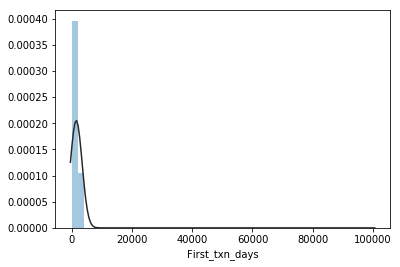

In [172]:
# cust_df.Points.fillna('0', inplace=True)
import seaborn as sns
from scipy.stats import norm
ax = sns.distplot(cust_df.First_txn_days, fit=norm, kde=False)

In [173]:
cust_df.First_txn_days.describe()

count    100000.000000
mean       1546.154880
std        1940.293916
min         199.000000
25%         868.000000
50%        1420.000000
75%        2073.000000
max       99999.000000
Name: First_txn_days, dtype: float64

In [174]:
cust_df.loc[np.logical_and(cust_df.First_txn_days >= 199,  cust_df.First_txn_days < 868), "First_txn_days"] = 0
cust_df.loc[np.logical_and(cust_df.First_txn_days >= 868,  cust_df.First_txn_days < 1420), "First_txn_days"] = 1
cust_df.loc[np.logical_and(cust_df.First_txn_days >= 1420,  cust_df.First_txn_days < 2073), "First_txn_days"] = 2
cust_df.loc[cust_df.First_txn_days >= 2073, "First_txn_days"] = 3

In [175]:
cust_df.First_txn_days = cust_df.First_txn_days.astype('int')

In [176]:
# cust_df.Last_accr_txn_days.value_counts()

In [177]:
cust_df.loc[np.logical_and(cust_df.Last_accr_txn_days >= 73,  cust_df.Last_accr_txn_days < 95), "Last_accr_txn_days"] = 0
cust_df.loc[np.logical_and(cust_df.Last_accr_txn_days >= 95,  cust_df.Last_accr_txn_days < 134), "Last_accr_txn_days"] = 1
cust_df.loc[np.logical_and(cust_df.Last_accr_txn_days >= 134,  cust_df.Last_accr_txn_days < 272), "Last_accr_txn_days"] = 2
cust_df.loc[cust_df.Last_accr_txn_days >= 272, "Last_accr_txn_days"] = 3

In [178]:
cust_df.Last_accr_txn_days = cust_df.Last_accr_txn_days.astype('int')

In [179]:
cust_demo = pd.read_excel("data/Customer_Demographics.xlsx")

In [180]:
cust_demo.Age.describe()

count    73904.000000
mean        37.032096
std          9.319975
min          1.000000
25%         31.000000
50%         36.000000
75%         42.000000
max        137.000000
Name: Age, dtype: float64

In [181]:
cust_demo.Age.fillna(34, inplace=True)

In [182]:
cust_demo.loc[np.logical_and(cust_demo.Age >= 1,  cust_demo.Age < 31), "Age"] = 0
cust_demo.loc[np.logical_and(cust_demo.Age >= 31,  cust_demo.Age < 36), "Age"] = 1
cust_demo.loc[np.logical_and(cust_demo.Age >= 36,  cust_demo.Age < 42), "Age"] = 2
cust_demo.loc[cust_demo.Age >= 42, "Age"] = 3

In [183]:
cust_df['Age'] = cust_demo.Age

In [184]:
cust_df['Age'] = cust_df['Age'].astype('int')

In [185]:
cust_demo.Age[cust_demo.Age>80].count()

0

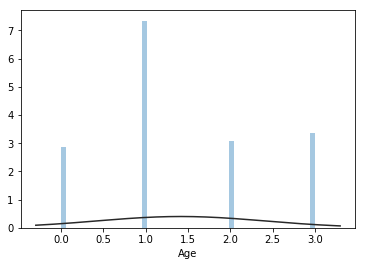

In [186]:
from scipy.stats import norm
ax = sns.distplot(cust_demo.Age, fit=norm, kde=False)

In [187]:
cust_df.Age.value_counts()

1    44077
3    20151
2    18497
0    17275
Name: Age, dtype: int64

In [188]:
# cust_df.to_csv("cust_df.csv", index=False)

In [189]:
cust_df.dtypes

Customer_ID            int64
Nationality           object
Income_Range          object
Job_Type              object
Marital_Status        object
Gender                object
State                 object
Language              object
Loyalty_Status        object
Points                 int64
First_txn_days         int64
Last_accr_txn_days     int64
Age                    int64
dtype: object

In [190]:
cust_df.Age.value_counts()

1    44077
3    20151
2    18497
0    17275
Name: Age, dtype: int64

In [191]:
cols = cust_df.select_dtypes(include=[np.object]).columns

In [192]:
# cust_df.join(pd.get_dummies(cust_df.select_dtypes(include=[np.object])))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cust_df[cols] = cust_df[cols].apply(le.fit_transform)

In [193]:
len(cust_df.columns)

13

In [194]:
cust_df.head(1)

,Customer_ID,Nationality,Income_Range,Job_Type,Marital_Status,Gender,State,Language,Loyalty_Status,Points,First_txn_days,Last_accr_txn_days,Age
0,1800000006365760,52,4,4,0,1,0,1,0,4,3,0,3


In [195]:
cust_df.to_csv("cust_df.csv", index=False)

# STORE

In [196]:
store = pd.read_excel('data/Store_Master.xlsx')

In [197]:
store.Geo_Field.fillna("UNKNOWN", inplace=True)

In [198]:
store.tail()

,Territory,Business,Region,Region_Code,Store_Code,Store_Name,Mall_Name,Store_Format,Sales_Per_Day,Store_Launch_Date,Train_Test_Store,Geo_Field,Store_Size_Sq_Ft,Customer_Count,Total_Revenue
30,United Arab Emirates,Max,MX - Abu Dhabi,602,60275,Max Makhani Zakher,Abu Dhabi Co-Op Mall-UAE,NaN,498.182287,2017-03-20,Train,"24.503005, 54.382945",2178.431368,13669.0,5271266.780
31,United Arab Emirates,Max,MX - Abu Dhabi,602,60301,MAX- Abudhabi Al Wahda,AL Wahda,Mall Stores,10861.009520,2018-01-30,Test,"24.470587, 54.372679",23288.338616,NaN,7472374.550
32,United Arab Emirates,Max,MX - Sharjah,606,60298,MAX - Matejer Al Juraina,Matejer Al Juraina,Mall Stores,4099.543401,2018-01-07,Test,"25.296484, 55.489202",8391.589347,NaN,2820485.860
33,United Arab Emirates,Max,MX - Abu Dhabi,602,60300,MAX-WTC,WTC,Mall Stores,7036.233391,2018-02-01,Test,"24.487658, 54.357529",6604.762130,NaN,2701913.622
34,United Arab Emirates,Max,MX - Abu Dhabi,602,60299,MAX-Alain Mall,Alain Mall,Mall Stores,5157.825699,2018-02-01,Test,"24.222016, 55.781629",3266.388547,NaN,479677.790


In [199]:
store["isMall"] = 1
store.loc[store["Mall_Name"] == "STANDALONE" ,"isMall"] = 0

In [200]:
# dropping columns which has no distinct values or not useful
store.drop(['Territory', 'Business', 'Store_Name', 'Mall_Name', 'Train_Test_Store','Customer_Count', 'Total_Revenue',\
            'Store_Launch_Date', 'Region' ], inplace=True, axis=1)

In [201]:
store.Store_Format.fillna("Mall Stores", inplace=True)

In [202]:
store.tail()

,Region_Code,Store_Code,Store_Format,Sales_Per_Day,Geo_Field,Store_Size_Sq_Ft,isMall
30,602,60275,Mall Stores,498.182287,"24.503005, 54.382945",2178.431368,1
31,602,60301,Mall Stores,10861.009520,"24.470587, 54.372679",23288.338616,1
32,606,60298,Mall Stores,4099.543401,"25.296484, 55.489202",8391.589347,1
33,602,60300,Mall Stores,7036.233391,"24.487658, 54.357529",6604.762130,1
34,602,60299,Mall Stores,5157.825699,"24.222016, 55.781629",3266.388547,1


In [203]:
store.dtypes

Region_Code           int64
Store_Code            int64
Store_Format         object
Sales_Per_Day       float64
Geo_Field            object
Store_Size_Sq_Ft    float64
isMall                int64
dtype: object

In [204]:
store.Region_Code = store.Region_Code.astype('object')

In [205]:
store.Sales_Per_Day.value_counts()

2053.035168     1
1045.779749     1
1965.523053     1
10861.009520    1
773.945840      1
3319.885702     1
4462.359330     1
2166.127477     1
3774.638096     1
369.319201      1
1699.560982     1
2036.012120     1
1331.402147     1
2265.965914     1
2221.872874     1
2943.555700     1
4099.543401     1
1974.963188     1
2101.072259     1
5157.825699     1
1251.656549     1
1193.119529     1
1813.094697     1
1938.614747     1
3090.542301     1
544.074849      1
2537.820097     1
1211.477261     1
759.095717      1
3094.424495     1
2268.223683     1
3330.695720     1
7036.233391     1
498.182287      1
2631.139338     1
Name: Sales_Per_Day, dtype: int64

In [206]:
store.loc[np.logical_and(store.Sales_Per_Day >= 369.319201,  store.Sales_Per_Day < 1291.529348), "Sales_Per_Day"] = 0
store.loc[np.logical_and(store.Sales_Per_Day >= 1291.529348,  store.Sales_Per_Day < 2101.072259), "Sales_Per_Day"] = 1
store.loc[np.logical_and(store.Sales_Per_Day >= 2101.072259,  store.Sales_Per_Day < 3092.483398), "Sales_Per_Day"] = 2
store.loc[store.Sales_Per_Day >= 3092.483398, "Sales_Per_Day"] = 3

In [207]:
store.Store_Size_Sq_Ft.value_counts()

8317.736752     1
6604.762130     1
3467.799125     1
4189.720206     1
9654.989644     1
6845.497058     1
7846.686536     1
10085.472996    1
15609.687991    1
15897.142270    1
3699.470014     1
22866.922575    1
19200.122169    1
8391.589347     1
13789.949661    1
3266.388547     1
23368.665000    1
4852.220341     1
12950.629513    1
9582.354867     1
2708.813317     1
8162.046109     1
8792.292763     1
12425.516106    1
93125.240189    1
6698.117964     1
16455.386430    1
19003.694395    1
2178.431368     1
18277.772523    1
8673.534535     1
23288.338616    1
6093.498908     1
12385.047461    1
4579.081667     1
Name: Store_Size_Sq_Ft, dtype: int64

In [208]:
store.loc[np.logical_and(store.Store_Size_Sq_Ft >= 2178.431368,  store.Store_Size_Sq_Ft < 6349.130519), "Store_Size_Sq_Ft"] = 0
store.loc[np.logical_and(store.Store_Size_Sq_Ft >= 6349.130519,  store.Store_Size_Sq_Ft < 8792.292763), "Store_Size_Sq_Ft"] = 1
store.loc[np.logical_and(store.Store_Size_Sq_Ft >= 8792.292763,  store.Store_Size_Sq_Ft < 15753.415130), "Store_Size_Sq_Ft"] = 2
store.loc[store.Store_Size_Sq_Ft >= 15753.415130, "Store_Size_Sq_Ft"] = 3

In [209]:
# store = store.join(pd.get_dummies(store.select_dtypes(include=[np.object])))

In [210]:
store.head(1)

,Region_Code,Store_Code,Store_Format,Sales_Per_Day,Geo_Field,Store_Size_Sq_Ft,isMall
0,602,60077,Mall Stores,0.0,"25.618167, 53.441646",0.0,1


In [211]:
store.select_dtypes(include=[np.object]).columns

Index(['Region_Code', 'Store_Format', 'Geo_Field'], dtype='object')

In [212]:
cols = store.select_dtypes(include=[np.object]).columns

In [213]:
# cust_df.join(pd.get_dummies(cust_df.select_dtypes(include=[np.object])))
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
store[cols] = store[cols].apply(le.fit_transform)

In [214]:
store.to_csv("store_df.csv", index=False)

In [215]:
store.head(1)

,Region_Code,Store_Code,Store_Format,Sales_Per_Day,Geo_Field,Store_Size_Sq_Ft,isMall
0,1,60077,0,0.0,24,0.0,1
